In [1]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

import anndata
from scipy.stats import spearmanr, pearsonr
import numpy as np
from PIL import Image
import matplotlib

from digitalhistopathology.clustering.clustering_utils import plot_ari_scores_all_patients
import warnings

# Suppress all UserWarning messages
warnings.filterwarnings("ignore", category=UserWarning)

Image.MAX_IMAGE_PIXELS = None
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

2025-07-23 15:54:09.770837: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2025-07-23 15:54:09.770936: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2025-07-23 15:54:09.770948: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


[KeOps] Warning : cuda was detected, but driver API could not be initialized. Switching to cpu only.


In [ ]:
# Load configuration
with open("../config/config_notebooks.json", "r") as config_file:
    config = json.load(config_file)

In [ ]:
from digitalhistopathology.benchmark.benchmark_clustering import BenchmarkClustering

# Initialize the BenchmarkClustering object

saving_folder=os.path.join(config['base_benchmark_folder'], "unsupervised_clustering_ARI", "kmeans")
extension='pdf'


benchmark_clustering = BenchmarkClustering(path_to_pipeline=config['path_to_base_pipelines'],
                                           pipelines_list=config['base_model_list'],
                                           results_folder="../results",
                                           saving_folder=saving_folder,
                                           dataset=config['dataset'],
                                           extension=extension
                                           )

/idiap/temp/lfournier/miniconda3/envs/digitalhisto/lib/python3.10/site-packages/stlearn/tools/microenv/cci/het.py:192: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(parallel=True, nopython=False)


['uni', 'uni2', 'provgigapath', 'virchow', 'ctranspath', 'simclr']
<class 'list'>
Label files: ['../results/compute_patches/TNBC/spots_labels.csv']


In [ ]:


a = config["base_color_palette"]
sns.set_palette(a)
base_model_palette = config["base_model_palette"]

base_model_list = config["base_model_list"]
benchmark_folder = config["base_benchmark_folder"]

## Create Figure2 folder
if not os.path.exists(os.path.join(config['figures_folder'], "Figure2")):
    os.makedirs(os.path.join(config['figures_folder'], "Figure2"))

## Create Figure3 folder
if not os.path.exists(os.path.join(config['figures_folder'], "Figure3")):
    os.makedirs(os.path.join(config['figures_folder'], "Figure3"))

## Create Figure4 folder
if not os.path.exists(os.path.join(config['figures_folder'], "Figure4")):
    os.makedirs(os.path.join(config['figures_folder'], "Figure4"))
    
## Create Figure5 folder
if not os.path.exists(os.path.join(config['figures_folder'], "Figure5")):
    os.makedirs(os.path.join(config['figures_folder'], "Figure5"))

## Comparison between linear and unlinear clustering

In [4]:
try:
    with open(os.path.join(benchmark_folder, 'unsupervised_clustering_ARI', 'kmeans', 'unsupervised_clustering_results_optk.json')) as f:
        raw_clust = json.load(f)
except:
    raw_clust = benchmark_clustering.unsupervised_clustering_benchmark(n_clusters=None, clustering_name='raw')

try:
    with open(os.path.join(benchmark_folder, 'unsupervised_clustering_ARI', 'kmeans',  'svd5_multiplied_by_S_unsupervised_clustering_results_optk.json')) as f:
        svd_clust = json.load(f)
except:
    svd_clust = benchmark_clustering.unsupervised_clustering_benchmark(n_clusters=None, clustering_name='svd5')
    

try:
    with open(os.path.join(benchmark_folder, 'unsupervised_clustering_ARI', 'kmeans', 'best_umap_ari_per_slide.json')) as f:
        umap_clust = json.load(f)
except:
    umap_clust = benchmark_clustering.get_best_UMAP_ari_per_slide(force_loading=True)


Loading unsupervised clustering results for model uni...
Loading unsupervised clustering results for model uni2...
Loading unsupervised clustering results for model provgigapath...
Loading unsupervised clustering results for model virchow...
Loading unsupervised clustering results for model ctranspath...
Loading unsupervised clustering results for model simclr...
Loading unsupervised clustering results for model uni...
Loading unsupervised clustering results for model uni2...
Loading unsupervised clustering results for model provgigapath...
Loading unsupervised clustering results for model virchow...
Loading unsupervised clustering results for model ctranspath...
Loading unsupervised clustering results for model simclr...
Embeddings per patient: None
Model: uni
Force loading best UMAP parameters for model uni for existing patients...
Model: uni2
Force loading best UMAP parameters for model uni2 for existing patients...
Model: provgigapath
Force loading best UMAP parameters for model pr

In [5]:
for model in raw_clust.keys():
    print(f"Model: {model}: ari all: {raw_clust[model]['all']['ari']}, ari mean: {raw_clust[model]['mean']['ari']}")

Model: uni: ari all: 0.22945338467221008, ari mean: 0.31822428105308864
Model: uni2: ari all: 0.2595913233853325, ari mean: 0.3139097015821113
Model: provgigapath: ari all: 0.2299636692035338, ari mean: 0.31309220450878333
Model: virchow: ari all: 0.1866407945973877, ari mean: 0.22410518476052235
Model: ctranspath: ari all: 0.24960890161039437, ari mean: 0.37828175007495723
Model: simclr: ari all: 0.18543332486203534, ari mean: 0.28912974364688887


In [6]:
for model in raw_clust.keys():
    print(f"Model: {model}: ari tumor: {raw_clust[model]['ARI_tumor']}")

Model: uni: ari tumor: 0.01924608024415077
Model: uni2: ari tumor: 0.016880599202019578
Model: provgigapath: ari tumor: 0.018199372273981558
Model: virchow: ari tumor: 0.013451746743232483
Model: ctranspath: ari tumor: 0.01970648911750638
Model: simclr: ari tumor: 0.01817290863007095


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


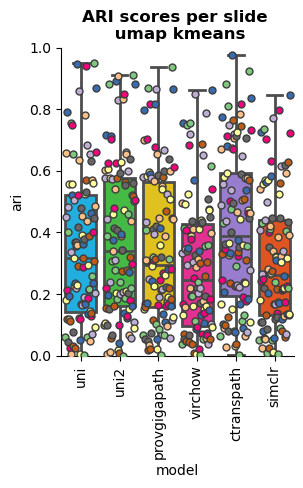

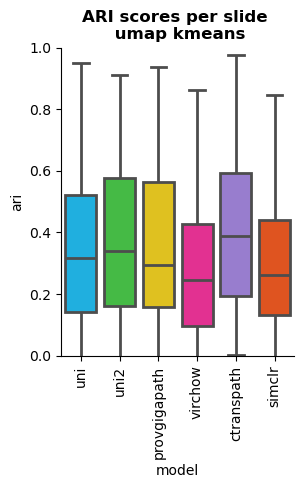

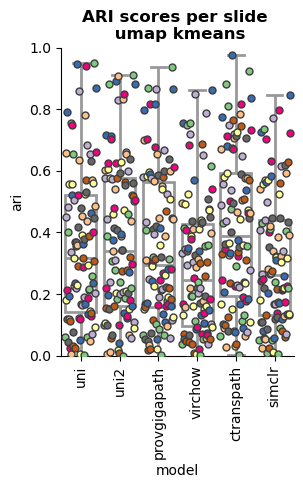

In [7]:
# for clust_dict, clust_name in zip([raw_clust, svd_clust, umap_clust], ["raw", "svd", "umap"]):

plt.figure(figsize=(3,4))
plot_ari_scores_all_patients(umap_clust, model_list=umap_clust.keys(), color_boxes=True, palette=base_model_palette)
plt.ylim(0, 1)
plt.title(f"ARI scores per slide \n umap kmeans", weight='bold')
# plt.savefig(os.path.join(config["figures_folder"],"Figure2/ARI_scores_boxplot_umap_kmeans_colored_with_patient.pdf"), bbox_inches='tight')
if len(umap_clust[base_model_list[0]]) > 15:
    plt.legend().remove()
    
plt.figure(figsize=(3,4))
plot_ari_scores_all_patients(umap_clust, model_list=umap_clust.keys(), stripplot=False, color_boxes=True, palette=base_model_palette)
plt.ylim(0, 1)
plt.title(f"ARI scores per slide \n umap kmeans", weight='bold')
# plt.savefig(os.path.join(config["figures_folder"],"Figure2/ARI_scores_boxplot_umap_kmeans_colored_without_patient.pdf"), bbox_inches='tight')
if len(umap_clust[base_model_list[0]]) > 15:
    plt.legend().remove()
    
plt.figure(figsize=(3,4))
plot_ari_scores_all_patients(umap_clust, model_list=umap_clust.keys(), stripplot=True, color_boxes=False)
plt.ylim(0, 1)
plt.title(f"ARI scores per slide \n umap kmeans", weight='bold')
# plt.savefig(os.path.join(config["figures_folder"],"Figure2/ARI_scores_boxplot_umap_kmeans_no_color_with_patient.pdf"), bbox_inches='tight')
if len(umap_clust[base_model_list[0]]) > 15:
    plt.legend().remove()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'ARI scores per slide \n UMAP k-means')

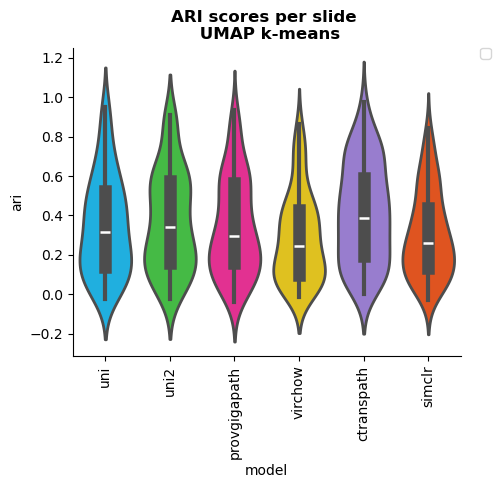

In [8]:


ari_scores = {}
for model in umap_clust.keys():
    ari_scores[model] = {}
    for patient in umap_clust[model].keys():
        if (patient != 'all') and (patient != 'mean'):
            ari_scores[model][patient] = umap_clust[model][patient]['ari']
df_aris = pd.DataFrame.from_dict(ari_scores)
df_aris_melted = pd.melt(df_aris, var_name='model', value_name='ari')
df_aris_melted['patient'] = df_aris.index.to_list()*len(df_aris.columns)

plt.figure(figsize=(5,4))
sns.violinplot(data=df_aris_melted, x='model', y='ari', hue='model', linewidth=2)


plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.title(f'ARI scores per slide \n UMAP k-means', weight='bold')

Text(0.5, 1.0, 'Distribution of ARI scores for unsupervised clustering \n n_patient=94')

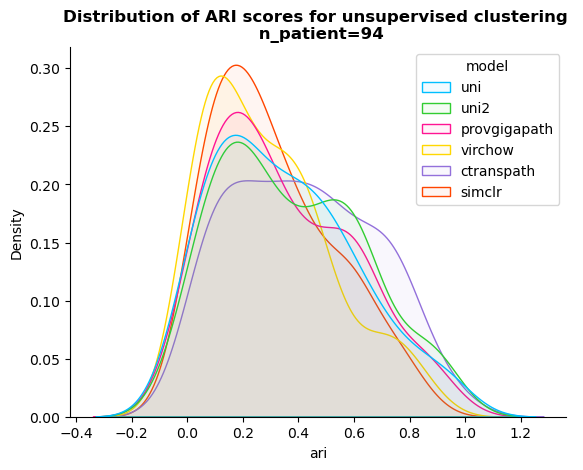

In [9]:
sns.kdeplot(data=df_aris_melted, x='ari', hue='model', fill=True, alpha=0.05)
sns.despine()
plt.title(f'Distribution of ARI scores for unsupervised clustering \n n_patient={len(list(umap_clust[list(umap_clust.keys())[0]].keys()))}', weight='bold')

In [10]:
# Scatter plot

In [11]:
dfs_clust = []
for clustering_dict, method in zip([raw_clust, svd_clust, umap_clust], ["raw", "svd", "umap"]):
#for clustering_dict, method in zip([umap_clust], ["umap"]):
    ari_scores = {}
    for model in clustering_dict.keys():
        ari_scores[model] = {}
        for patient in clustering_dict[model].keys():
            if patient != "ARI_tumor":
            #if (patient != 'all') and (patient != 'mean'):
                ari_scores[model][patient] = clustering_dict[model][patient]['ari']
    df_aris = pd.DataFrame.from_dict(ari_scores)
    df_aris_melted = pd.melt(df_aris, var_name='model', value_name='ari')
    df_aris_melted['patient'] = df_aris.index.to_list()*len(df_aris.columns)
    df_aris_melted['clustering'] = method
    dfs_clust.append(df_aris_melted)

df_comp = pd.concat(dfs_clust)




In [12]:
df_comp

,model,ari,patient,clustering
0,uni,0.401375,TNBC1_CN1_C1,raw
1,uni,0.502341,TNBC2_CN1_E1,raw
2,uni,0.168349,TNBC3_CN2_C1,raw
3,uni,0.824906,TNBC4_CN2_D2,raw
4,uni,0.328768,TNBC5_CN3_D1,raw
...,...,...,...,...
559,simclr,0.132813,TNBC93,umap
560,simclr,0.390263,TNBC94,umap
561,simclr,0.135508,TNBC95,umap
562,simclr,0.846239,TNBC96,umap


In [13]:
df_comp[df_comp['clustering'] == 'raw'][['model', 'ari']].groupby('model').mean()

,ari
model,
ctranspath,0.376941
provgigapath,0.312226
simclr,0.288050
uni,0.317300
uni2,0.313344
virchow,0.223715


In [14]:
df_comp[df_comp['clustering'] == 'raw'][['model', 'ari']].groupby('model').std()

,ari
model,
ctranspath,0.221051
provgigapath,0.229228
simclr,0.220643
uni,0.243616
uni2,0.219737
virchow,0.197621


In [15]:
## Correlation with shannon entropy
import json 
with open(os.path.join(benchmark_folder, "shannon_entropy", "shannon_entropy_all_comps_raw.json")) as f:
    shannon_entropy = json.load(f)
    


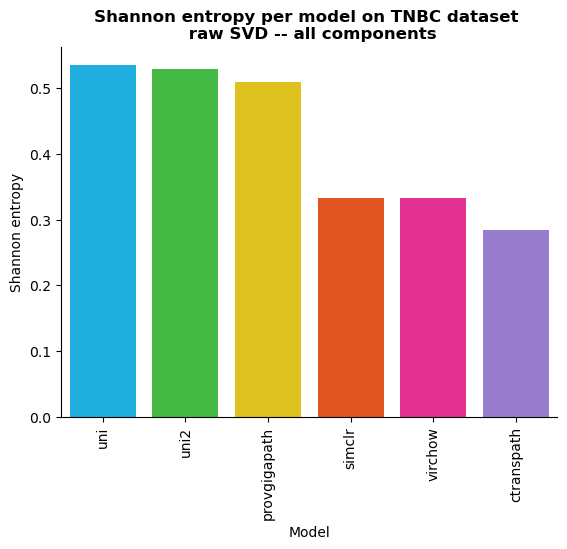

In [16]:

df_shannon = pd.DataFrame.from_dict(shannon_entropy, orient='index', columns=['shannon_entropy'])
df_shannon.rename(index={'handcrafted': 'handcrafted_features'}, inplace=True)

df_shannon.sort_values('shannon_entropy', inplace=True, ascending=False)
sns.barplot(data=df_shannon, 
            x=df_shannon.index, 
            y='shannon_entropy', 
            hue=df_shannon.index, palette=base_model_palette)
sns.despine()
plt.xlabel("Model")
plt.ylabel("Shannon entropy")
plt.title(f"Shannon entropy per model on {config['dataset']} dataset \n raw SVD -- all components", weight='bold')
plt.xticks(rotation=90)
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy.pdf"), bbox_inches='tight')

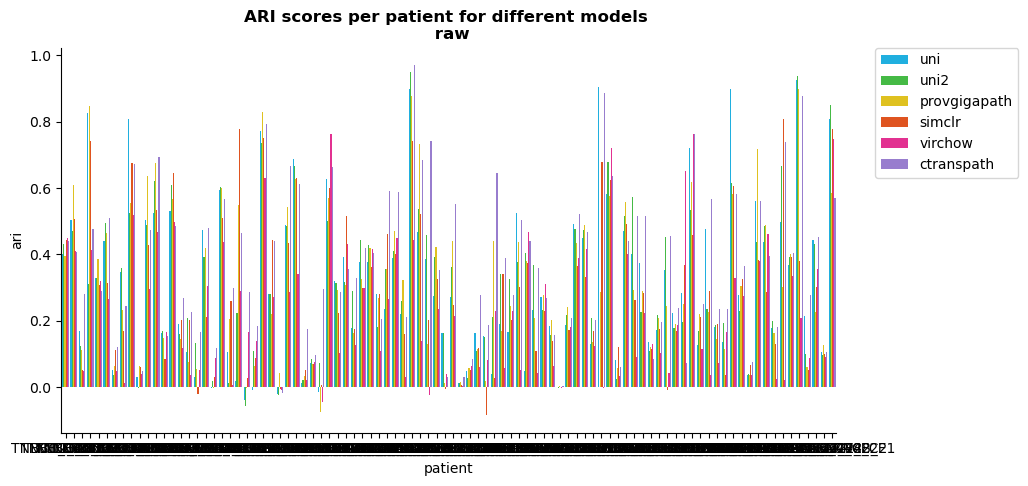

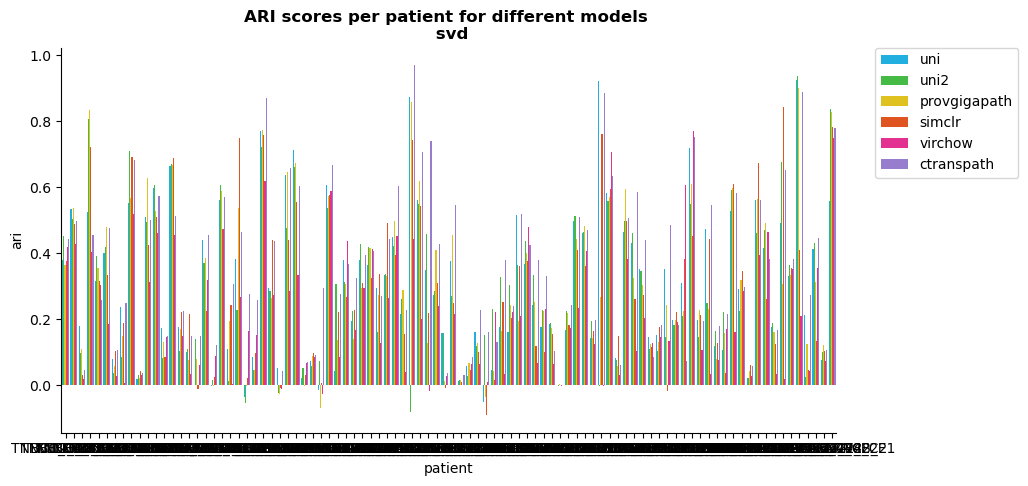

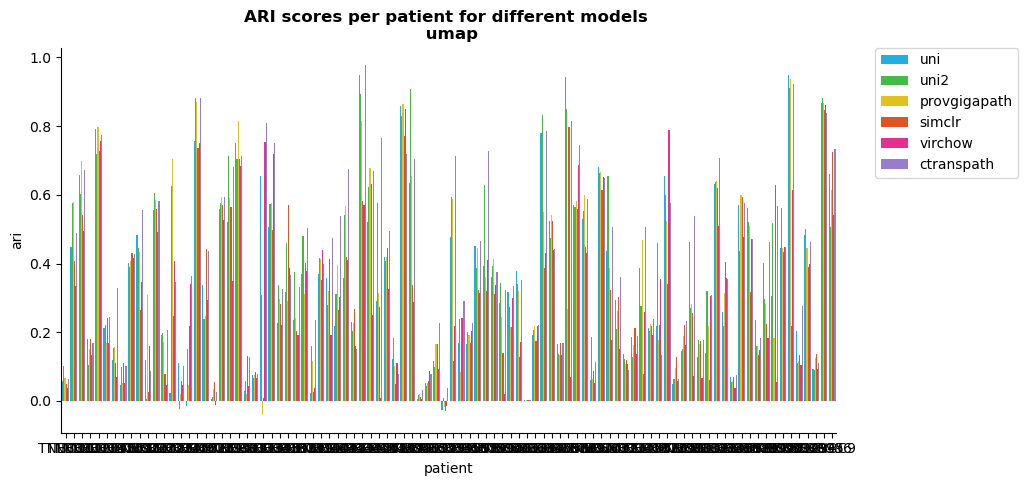

In [17]:
## ARI scores in the same order

for method in ["raw", "svd", "umap"]:
    ordered_dfs = []

    for model in df_shannon.index:
        ordered_dfs.append(df_comp[(df_comp['model'] == model) & (df_comp["clustering"] == method) & (df_comp['patient'] != 'all') & (df_comp['patient'] != 'mean')])

    df_comp_method = pd.concat(ordered_dfs)

    plt.figure(figsize=(10, 5))
    sns.barplot(data=df_comp_method, x='patient', y='ari', hue='model', palette=base_model_palette)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    sns.despine()
    plt.title(f'ARI scores per patient for different models \n {method}', weight='bold')

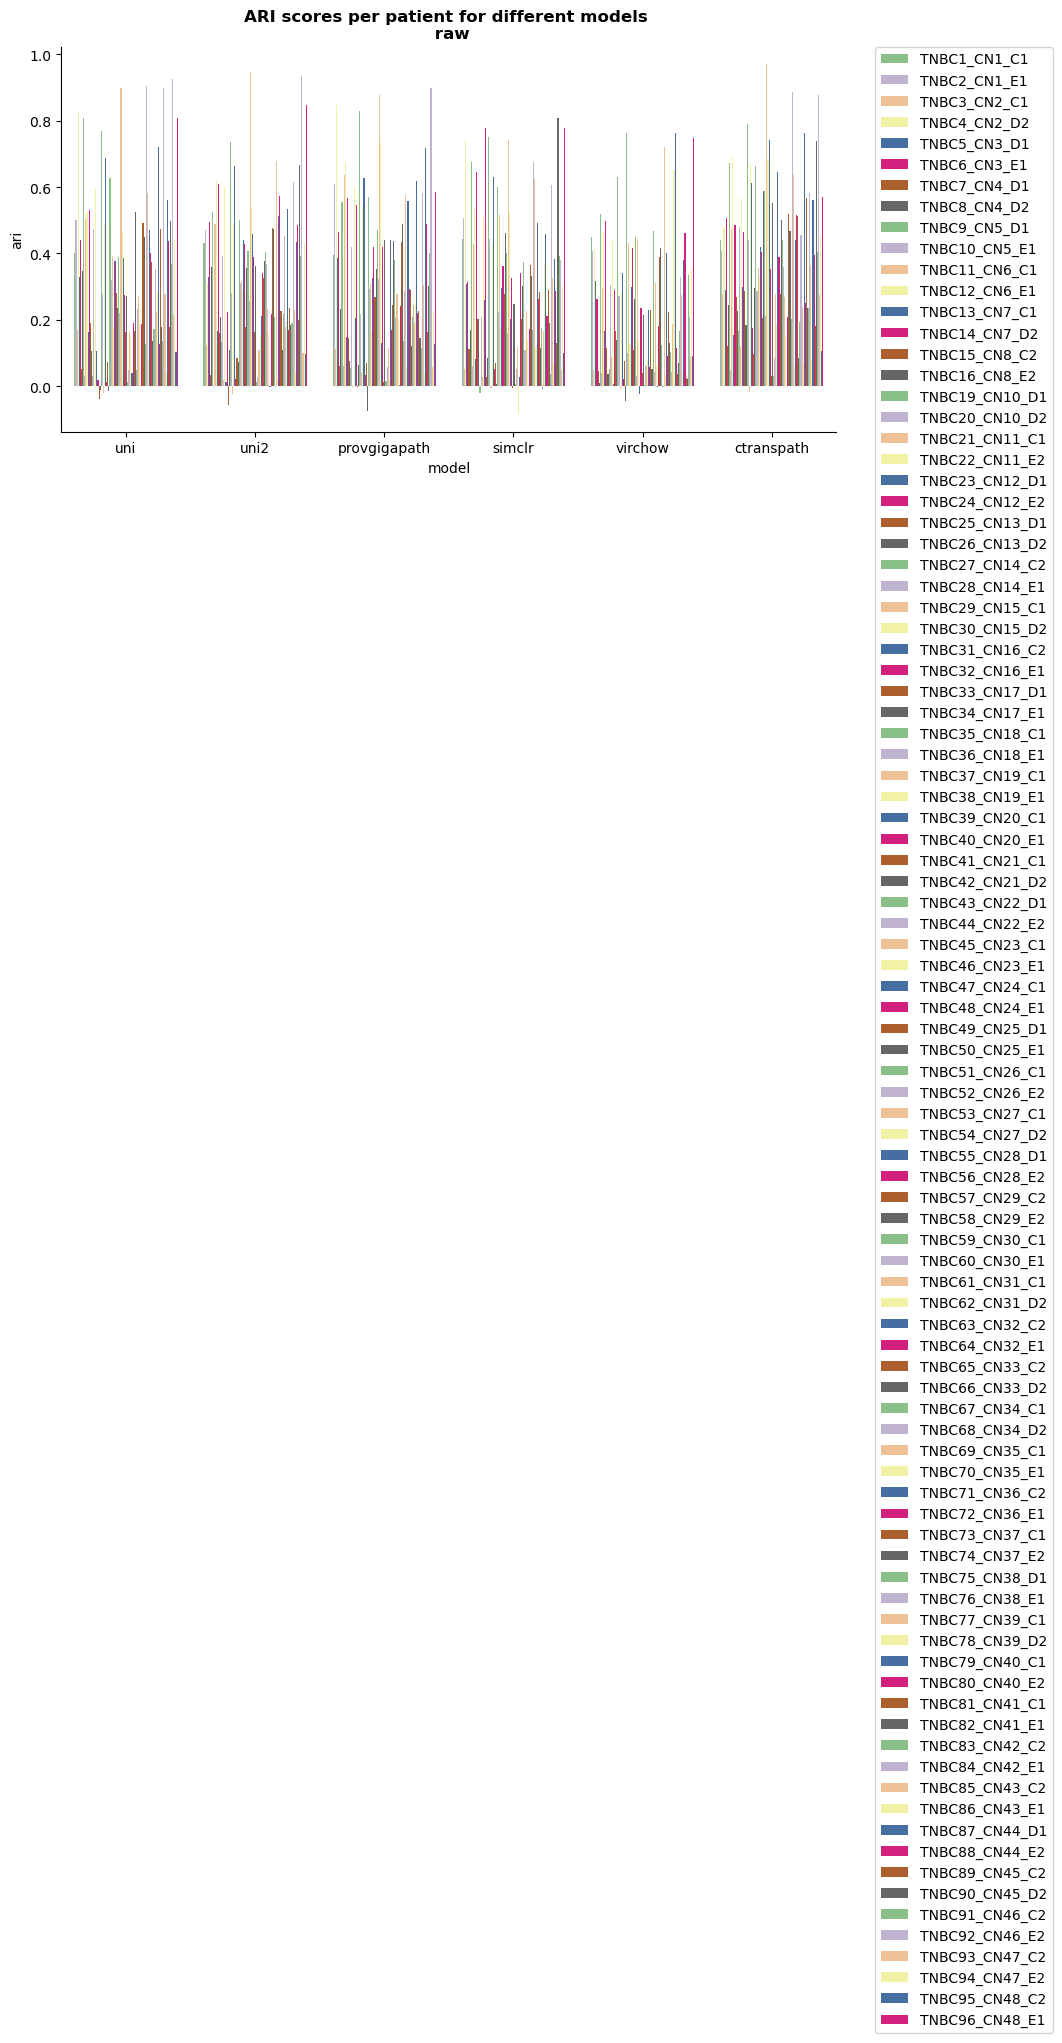

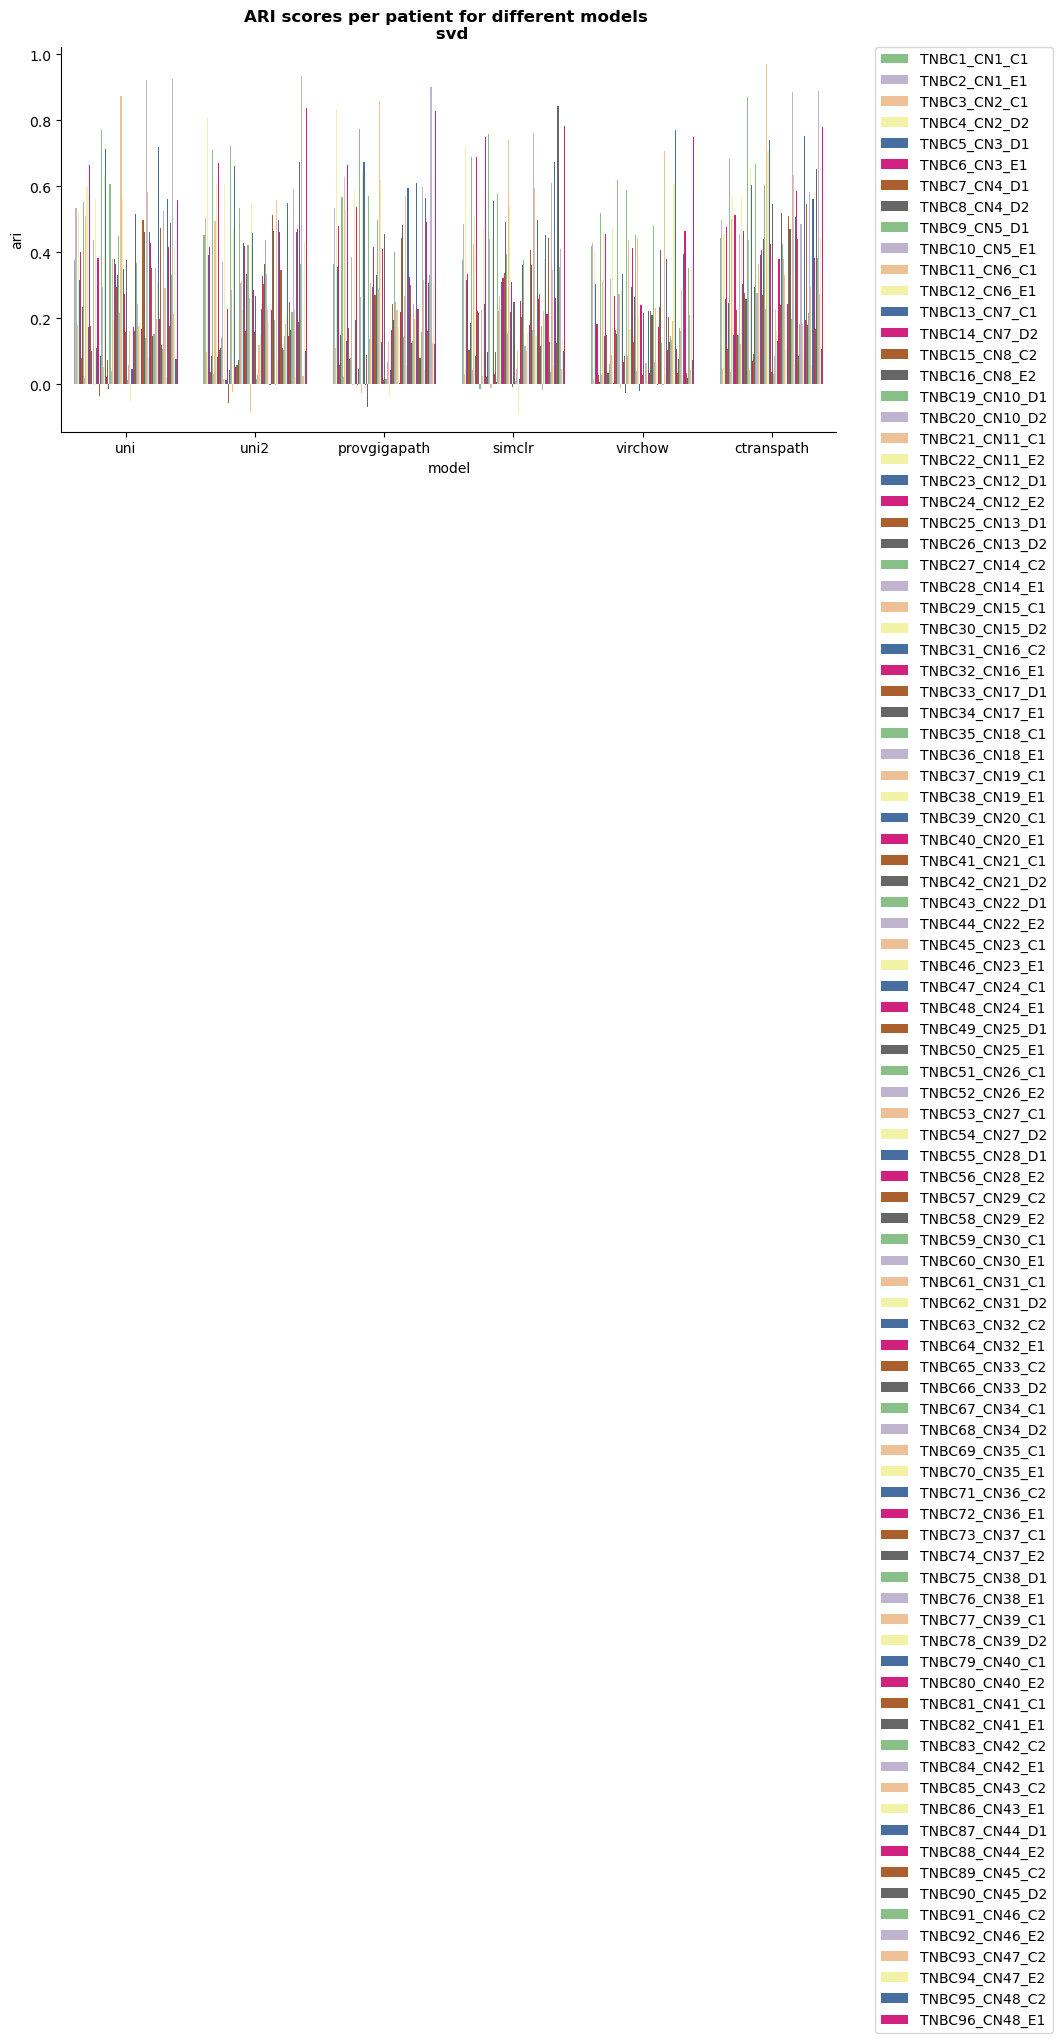

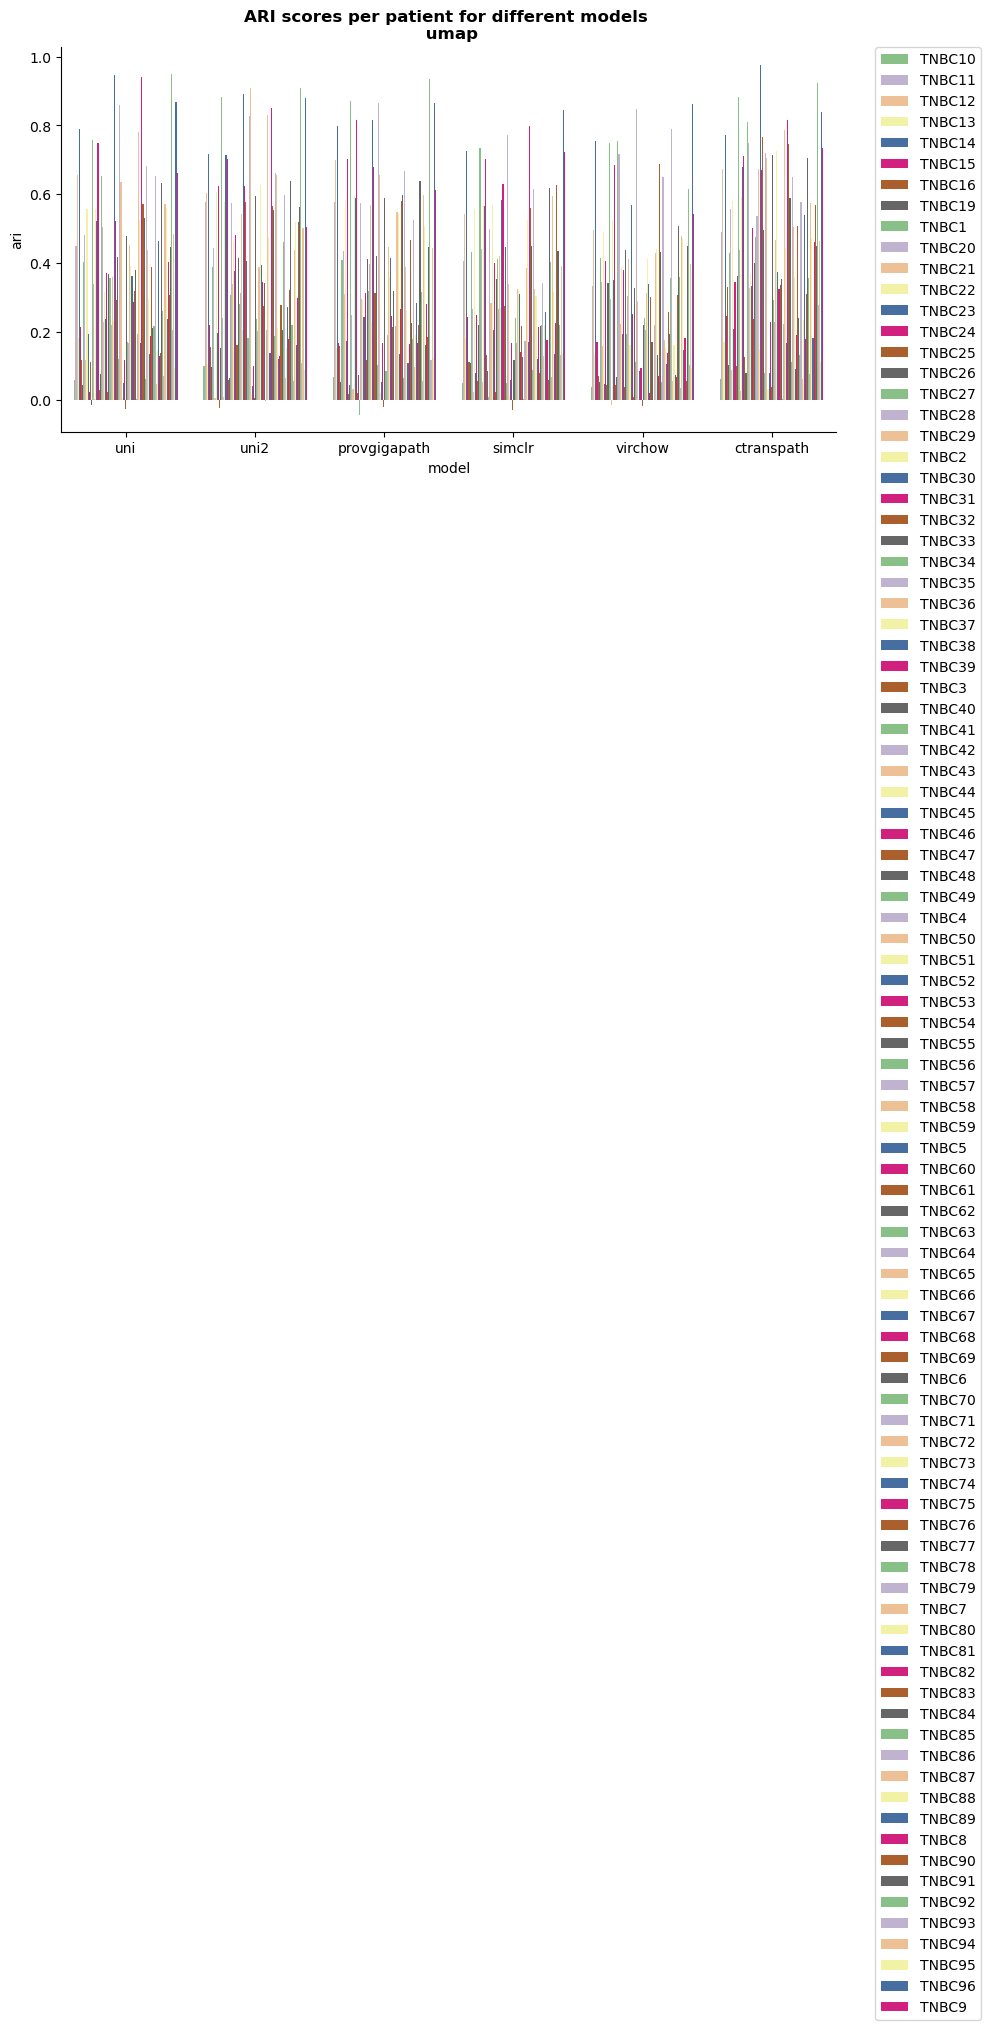

In [18]:
## ARI scores in the same order

for method in ["raw", "svd", "umap"]:
    ordered_dfs = []

    for model in df_shannon.index:
        ordered_dfs.append(df_comp[(df_comp['model'] == model) & (df_comp["clustering"] == method) & (df_comp['patient'] != 'all') & (df_comp['patient'] != 'mean')])

    df_comp_method = pd.concat(ordered_dfs)

    plt.figure(figsize=(10, 5))
    sns.barplot(data=df_comp_method, x='model', y='ari', hue='patient', palette="Accent")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    sns.despine()
    plt.title(f'ARI scores per patient for different models \n {method}', weight='bold')

In [19]:
import math
def make_spider(df, row, color, title):
    
    categories=list(df)[0:]
    N = len(categories)

    
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]
     
    plt.rc('figure', figsize=(5, 5))
 
    ax = plt.subplot(1,1,1, polar=True)
 
    ax.set_theta_offset(math.pi / 2)
    ax.set_theta_direction(-1)
    
 
   
    plt.xticks(angles[:-1], categories, color='black', size=12)
    ax.tick_params(axis='x', rotation=5.5)
    
    ax.set_rlabel_position(0)
    plt.yticks([0.1,0.2,0.3,0.4], ["0.1","0.2","0.3","0.4"], color="black", size=10)
    plt.ylim(0,0.55)
 
    
    values=df.reset_index().loc[row].values.tolist()[1:]
    values += values[:1]
    ax.plot(angles, values, color = color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color = color, alpha = 0.1)
 
  
    plt.title(title, fontsize=20, x = 0.5, y = 1.1)
    

In [20]:
df_comp_patient = df_comp[df_comp["patient"].isin(["A1", "B1", "C1", "D1", "E1", "F1", "G2", "H1"])]


In [21]:
base_model_list

['uni', 'uni2', 'virchow', 'provgigapath', 'ctranspath', 'simclr']

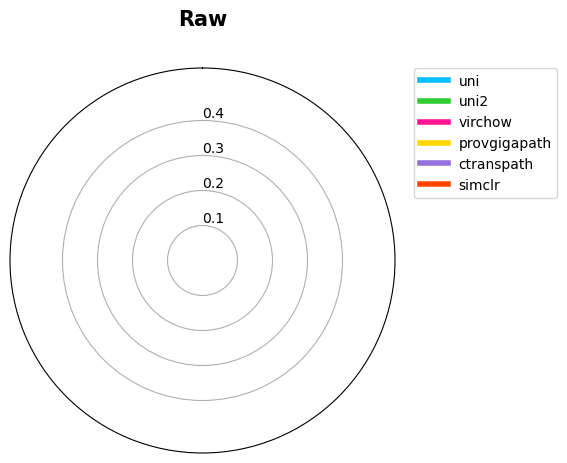

In [22]:
for model in base_model_list:
    d_test = df_comp_patient[(df_comp_patient["model"] == model) & (df_comp_patient["clustering"] == "raw")].T
    d_test.columns = d_test.loc['patient'].values
    make_spider(d_test, row=1, color=base_model_palette[model], title=model)
    plt.title("Raw", weight='bold', y=1.09, fontsize=15)

handles = [plt.Line2D([0], [0], color=base_model_palette[model], lw=4) for model in base_model_list]
plt.legend(handles, base_model_list, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig(os.path.join(config['figures_folder'], "Figure2/unsupervised_clustering_radarplot_raw.pdf"), bbox_inches='tight')

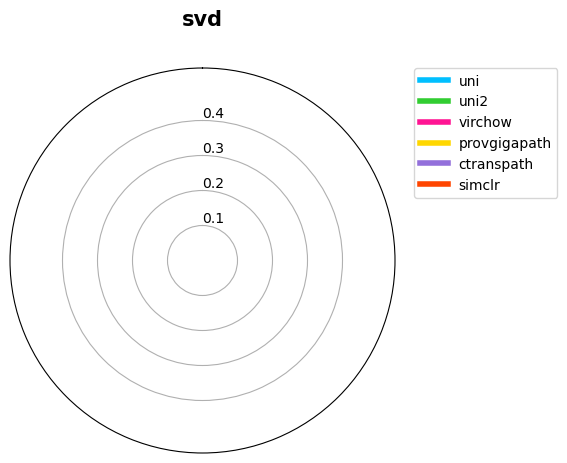

In [23]:
for model in base_model_list:
    d_test = df_comp_patient[(df_comp_patient["model"] == model) & (df_comp_patient["clustering"] == "svd")].T
    d_test.columns = d_test.loc['patient'].values
    make_spider(d_test, row=1, color=base_model_palette[model], title=model)
    plt.title("svd", weight='bold', y=1.09, fontsize=15)
    
handles = [plt.Line2D([0], [0], color=base_model_palette[model], lw=4) for model in base_model_list]
plt.legend(handles, base_model_list, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig(os.path.join(config['figures_folder'], "Figure2/unsupervised_clustering_radarplot_svd.pdf"), bbox_inches='tight')

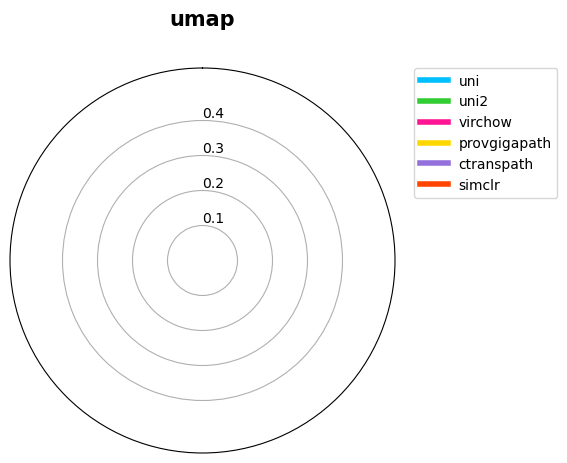

In [24]:
for model in base_model_list:
    d_test = df_comp_patient[(df_comp_patient["model"] == model) & (df_comp_patient["clustering"] == "umap")].T
    d_test.columns = d_test.loc['patient'].values
    make_spider(d_test, row=1, color=base_model_palette[model], title=model)
    plt.title("umap", weight='bold', y=1.09, fontsize=15)
handles = [plt.Line2D([0], [0], color=base_model_palette[model], lw=4) for model in base_model_list]
plt.legend(handles, base_model_list, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
plt.savefig(os.path.join(config['figures_folder'], "Figure2/unsupervised_clustering_radarplot_umap.pdf"), bbox_inches='tight')

In [25]:
ari_raw = pd.DataFrame.from_dict({model: {patient: raw_clust[model][patient]['ari'] for patient in raw_clust[model].keys() if patient not in ["ARI_tumor"]} for model in raw_clust.keys()})
df_raw_overall = pd.DataFrame(ari_raw.loc["all"])
df_raw_overall.columns = ['ari']

In [26]:
ari_svd = pd.DataFrame.from_dict({model: {patient: svd_clust[model][patient]['ari'] for patient in svd_clust[model].keys()  if patient != 'ARI_tumor'} for model in svd_clust.keys()})
df_svd_overall = pd.DataFrame(ari_svd.loc["all"])
df_svd_overall.columns = ['ari']

In [27]:
benchmark_clustering.image_embeddings

{}

In [28]:
ari_umap_overall = benchmark_clustering.get_best_UMAP_ari_overall()   

Computing best UMAP parameters for model uni...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni2...
Loading best UMAP parameters for model uni2...
Computing best UMAP parameters for model provgigapath...
Loading best UMAP parameters for model provgigapath...
Computing best UMAP parameters for model virchow...
Loading best UMAP parameters for model virchow...
Computing best UMAP parameters for model ctranspath...
Loading best UMAP parameters for model ctranspath...
Computing best UMAP parameters for model simclr...
Loading best UMAP parameters for model simclr...


In [ ]:


try:
    with open(os.path.join(config['base_benchmark_folder'], 'unsupervised_clustering_ARI', 'kmeans', f'best_umap_ari_overall.json')) as f:
        ari_umap_overall = json.load(f)
except:
    ari_umap_overall = benchmark_clustering.get_best_UMAP_ari_overall()
ari_umap_overall = benchmark_clustering.get_best_UMAP_ari_overall()   
df_umap_overall = pd.DataFrame(ari_umap_overall).T[['ari']]


Computing best UMAP parameters for model uni...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni2...
Loading best UMAP parameters for model uni2...
Computing best UMAP parameters for model provgigapath...
Loading best UMAP parameters for model provgigapath...
Computing best UMAP parameters for model virchow...
Loading best UMAP parameters for model virchow...
Computing best UMAP parameters for model ctranspath...
Loading best UMAP parameters for model ctranspath...
Computing best UMAP parameters for model simclr...
Loading best UMAP parameters for model simclr...
Computing best UMAP parameters for model uni...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni2...
Loading best UMAP parameters for model uni2...
Computing best UMAP parameters for model provgigapath...
Loading best UMAP parameters for model provgigapath...
Computing best UMAP parameters for model virchow...
Loading best UMAP parameters for m

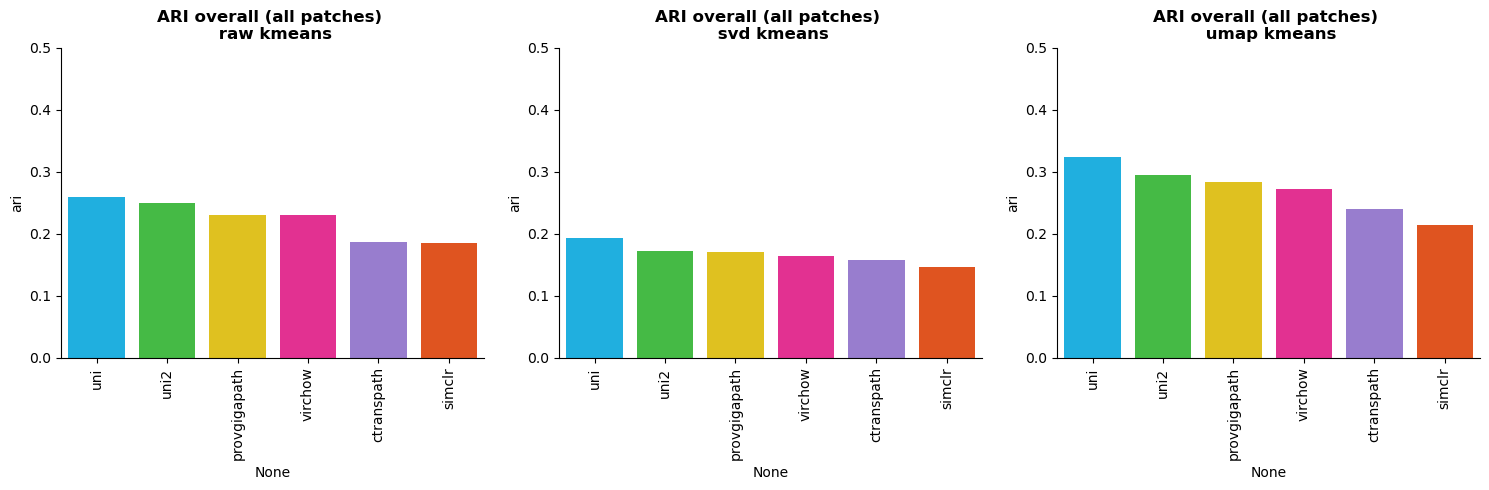

In [30]:
plt.figure(figsize=(15, 5))

names = ["raw kmeans", "svd kmeans", "umap kmeans"]

for i, df_ari_overall in enumerate([df_raw_overall, df_svd_overall, df_umap_overall]):
    plt.subplot(1, 3, 1 + i)
    sns.barplot(data=df_ari_overall.sort_values("ari", ascending=False), x=df_ari_overall.index, y="ari", hue=df_ari_overall.index, palette=base_model_palette)
    plt.xticks(rotation=90)
    sns.despine()
    plt.tight_layout()
    plt.ylim(0, 0.5)
    plt.title(f"ARI overall (all patches) \n {names[i]}", weight='bold')


plt.savefig(os.path.join(config['figures_folder'], "Figure2/unsupervised_clustering_raw_svd_umap_barplot.pdf"), bbox_inches='tight')



## Correlation ARI and shannon entropy

In [31]:
df_shannon.rename(index={'handcrafted': 'handcrafted_features'}, inplace=True)

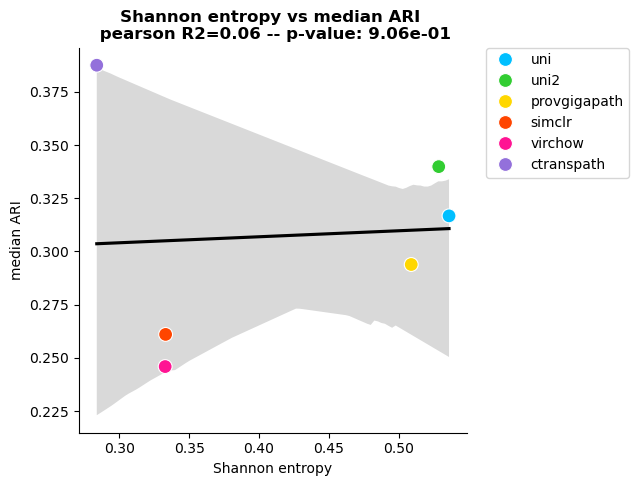

In [32]:
# df_model_summary = df_model_summary.drop(["uni_full_4096_prototypes"])
median_ari_per_model = df_comp[df_comp['clustering'] == 'umap'][['model', 'ari']].groupby('model').median()
median_ari_per_model.columns = ['median_ari']
df_model_summary = df_shannon.merge(median_ari_per_model, left_index=True, right_index=True)

s, p = pearsonr(df_model_summary['shannon_entropy'], df_model_summary['median_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='median_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='median_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100, zorder=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('median ARI')
plt.title(f'Shannon entropy vs median ARI \n pearson R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_median_ari.pdf"), bbox_inches='tight')

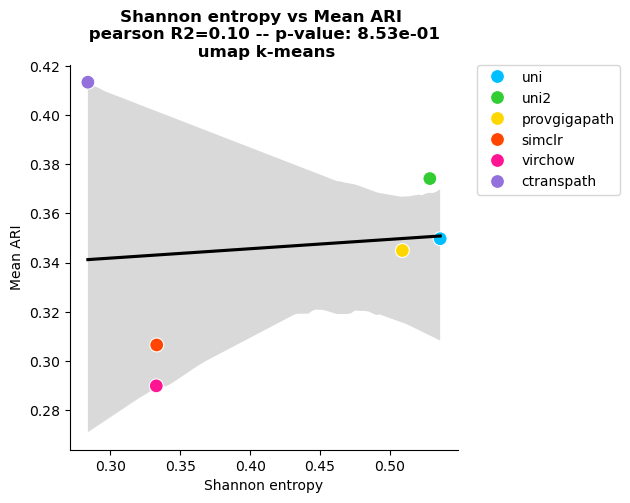

In [33]:
# df_model_summary = df_model_summary.drop(["uni_full_4096_prototypes"])
mean_ari_per_model = df_comp[df_comp['clustering'] == 'umap'][['model', 'ari']].groupby('model').mean()
mean_ari_per_model.columns = ['mean_ari']
df_model_summary = df_shannon.merge(mean_ari_per_model, left_index=True, right_index=True)

s, p = pearsonr(df_model_summary['shannon_entropy'], df_model_summary['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Mean ARI')
plt.title(f'Shannon entropy vs Mean ARI \n pearson R2={s:.2f} -- p-value: {p:.2e} \n umap k-means', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_mean_ari_umapkmeans.pdf"), bbox_inches='tight')

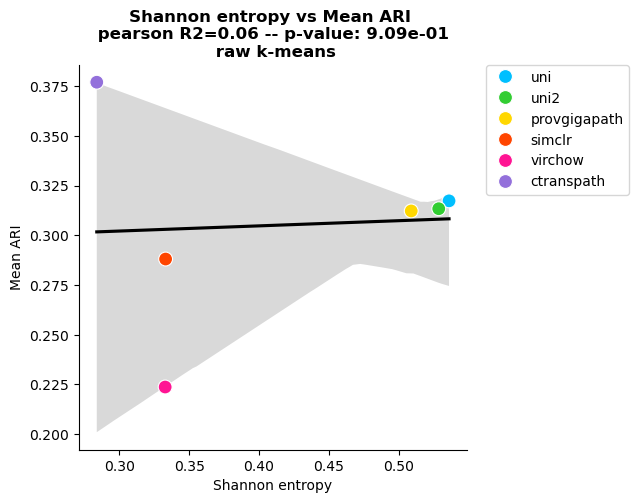

In [34]:
# df_model_summary = df_model_summary.drop(["uni_full_4096_prototypes"])
mean_ari_per_model = df_comp[df_comp['clustering'] == 'raw'][['model', 'ari']].groupby('model').mean()
mean_ari_per_model.columns = ['mean_ari']
df_model_summary = df_shannon.merge(mean_ari_per_model, left_index=True, right_index=True)

s, p = pearsonr(df_model_summary['shannon_entropy'], df_model_summary['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Mean ARI')
plt.title(f'Shannon entropy vs Mean ARI \n pearson R2={s:.2f} -- p-value: {p:.2e} \n raw k-means', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_mean_ari_rawkmeans.pdf"), bbox_inches='tight')

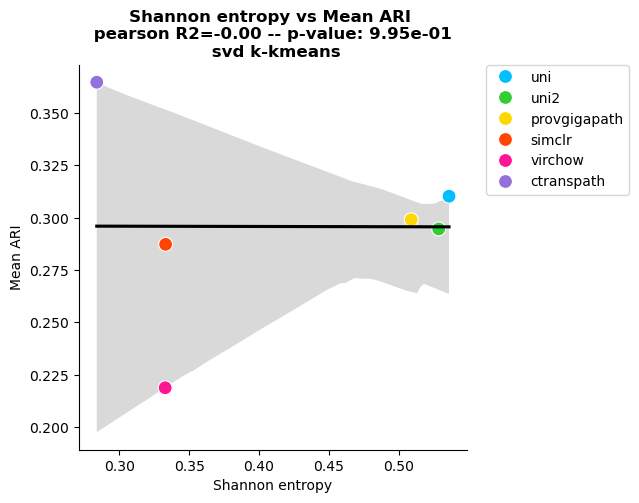

In [35]:
# df_model_summary = df_model_summary.drop(["uni_full_4096_prototypes"])
mean_ari_per_model = df_comp[df_comp['clustering'] == 'svd'][['model', 'ari']].groupby('model').mean()
mean_ari_per_model.columns = ['mean_ari']
df_model_summary = df_shannon.merge(mean_ari_per_model, left_index=True, right_index=True)

s, p = pearsonr(df_model_summary['shannon_entropy'], df_model_summary['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Mean ARI')
plt.title(f'Shannon entropy vs Mean ARI \n pearson R2={s:.2f} -- p-value: {p:.2e} \n svd k-kmeans', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_mean_ari_svdkmeans.pdf"), bbox_inches='tight')

In [36]:
try:
    with open(os.path.join(config['base_benchmark_folder'], 'unsupervised_clustering_ARI', 'kmeans', f"best_umap_ari_overall_annotated_only.json")) as f:
        overall_umap = json.load(f)
except:
    overall_umap = benchmark_clustering.get_best_UMAP_ari_overall(annotated_only=True)
    
overall_umap_aris = {}
for model in overall_umap.keys():
    overall_umap_aris[model] = overall_umap[model]['ari']

df_model_summary['overall_ari'] = pd.Series(overall_umap_aris)

Computing best UMAP parameters for model uni...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni2...
Loading best UMAP parameters for model uni2...
Computing best UMAP parameters for model provgigapath...
Loading best UMAP parameters for model provgigapath...
Computing best UMAP parameters for model virchow...
Loading best UMAP parameters for model virchow...
Computing best UMAP parameters for model ctranspath...
Loading best UMAP parameters for model ctranspath...
Computing best UMAP parameters for model simclr...
Loading best UMAP parameters for model simclr...


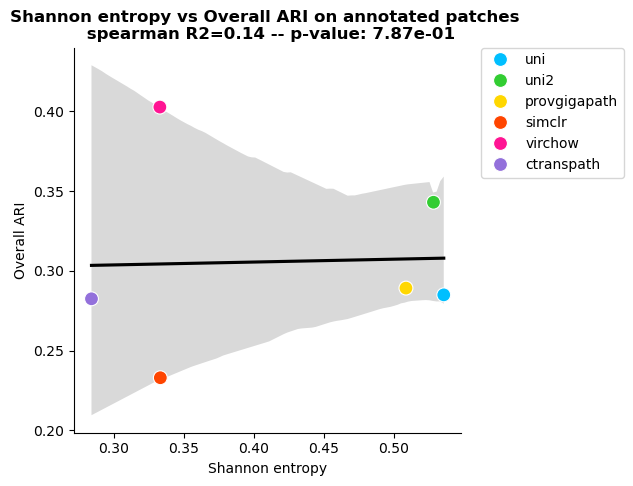

In [38]:
s, p = spearmanr(df_model_summary['shannon_entropy'], df_model_summary['overall_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Overall ARI')
plt.title(f'Shannon entropy vs Overall ARI on annotated patches \n spearman R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_overall_ari_annotated_only.pdf"), bbox_inches='tight')

Computing best UMAP parameters for model uni...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni2...
Loading best UMAP parameters for model uni2...
Computing best UMAP parameters for model provgigapath...
Loading best UMAP parameters for model provgigapath...
Computing best UMAP parameters for model virchow...
Loading best UMAP parameters for model virchow...
Computing best UMAP parameters for model ctranspath...
Loading best UMAP parameters for model ctranspath...
Computing best UMAP parameters for model simclr...
Loading best UMAP parameters for model simclr...


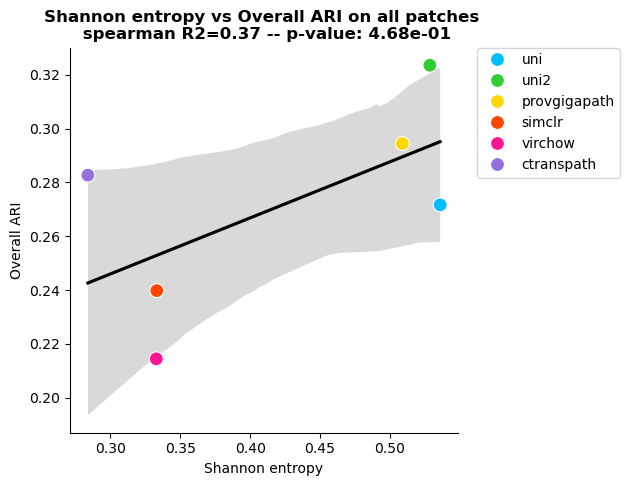

In [40]:
try:
    with open(os.path.join(config['base_benchmark_folder'], 'unsupervised_clustering_ARI', 'kmeans', f'best_umap_ari_overall.json')) as f:
        overall_umap = json.load(f)
except:
    overall_umap = benchmark_clustering.get_best_UMAP_ari_overall()
    
overall_umap_aris = {}
for model in overall_umap.keys():
    overall_umap_aris[model] = overall_umap[model]['ari']

df_model_summary['overall_ari'] = pd.Series(overall_umap_aris)

s, p = spearmanr(df_model_summary['shannon_entropy'], df_model_summary['overall_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100, zorder=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Overall ARI')
plt.title(f'Shannon entropy vs Overall ARI on all patches \n spearman R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_overall_ari.pdf"), bbox_inches='tight')

In [41]:
df_model_summary2 = df_comp.merge(df_shannon, left_on='model', right_index=True, how='left')
df_model_summary2

,model,ari,patient,clustering,shannon_entropy
0,uni,0.401375,TNBC1_CN1_C1,raw,0.535894
1,uni,0.502341,TNBC2_CN1_E1,raw,0.535894
2,uni,0.168349,TNBC3_CN2_C1,raw,0.535894
3,uni,0.824906,TNBC4_CN2_D2,raw,0.535894
4,uni,0.328768,TNBC5_CN3_D1,raw,0.535894
...,...,...,...,...,...
559,simclr,0.132813,TNBC93,umap,0.333180
560,simclr,0.390263,TNBC94,umap,0.333180
561,simclr,0.135508,TNBC95,umap,0.333180
562,simclr,0.846239,TNBC96,umap,0.333180


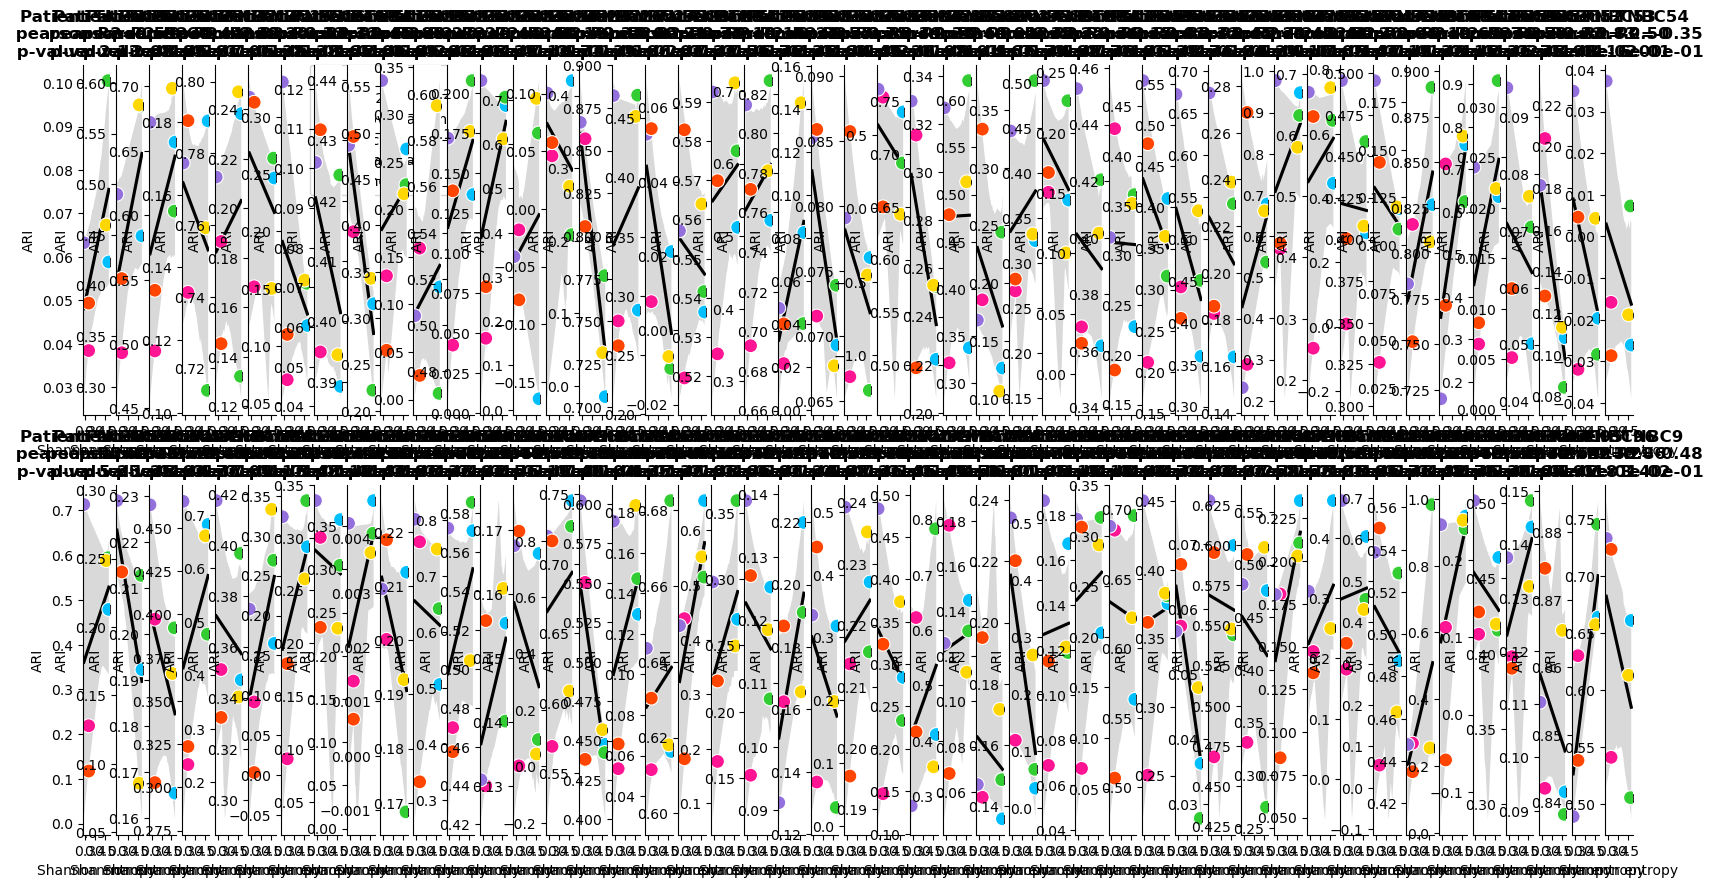

In [42]:
## Shannon vs ARI per patient


df_model_summary2 = df_comp[df_comp["clustering"] == 'umap'].merge(df_shannon, left_on='model', right_index=True, how='left')
n_patients = len(df_model_summary2['patient'].unique())
plt.figure(figsize=(20, 10))
for i, patient in enumerate(df_model_summary2['patient'].unique()):
    sub_df = df_model_summary2[df_model_summary2['patient'] == patient]

    s, p = pearsonr(sub_df['shannon_entropy'], sub_df['ari'])
    plt.subplot(2, int(np.ceil(n_patients/2)), i+1)
    sns.regplot(data=sub_df, x='shannon_entropy', y='ari', color='black')
    sns.scatterplot(data=sub_df, x='shannon_entropy', y='ari', hue=sub_df['model'],
                    palette=base_model_palette, s=100, zorder=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Shannon entropy')
    plt.ylabel('ARI')
    plt.title(f'Patient {patient} \n pearson R2={s:.2f} \n p-value: {p:.2e}', weight='bold')
    sns.despine()

    if i != 6:
        plt.legend().remove()
    else:
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

plt.savefig(os.path.join(config['figures_folder'], "Figure2/overall_shannon_vs_ari_per_patient.pdf"), bbox_inches='tight')
    


In [43]:
with open(os.path.join(config['base_benchmark_folder'], "shannon_entropy", "shannon_entropy_per_tumor_all_comps_raw.json")) as f:
    shannon_per_patient = json.load(f)
df_shannon_per_patient = pd.DataFrame.from_dict(shannon_per_patient, orient='index')
df_shannon_per_patient

df_model_summary2 = df_comp[df_comp["clustering"] == 'umap'].merge(df_shannon_per_patient, left_on='patient', right_index=True, how='left')

df_shannon_per_patient_melted = pd.melt(df_shannon_per_patient, var_name='patient', value_name='shannon_entropy_per_patient')
df_shannon_per_patient_melted['model'] = list(df_shannon_per_patient.index) * len(df_shannon_per_patient.columns)

if config['dataset'] == 'HER2':
    df_comp['patient'] = df_comp['patient'].apply(lambda x: x[0])
else:
    df_comp['patient'] = df_comp['patient'].apply(lambda x: x.split('_')[0])

df_model_summary2 = df_comp[df_comp["clustering"] == 'umap'].merge(df_shannon_per_patient_melted, on=['patient', 'model'])



    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


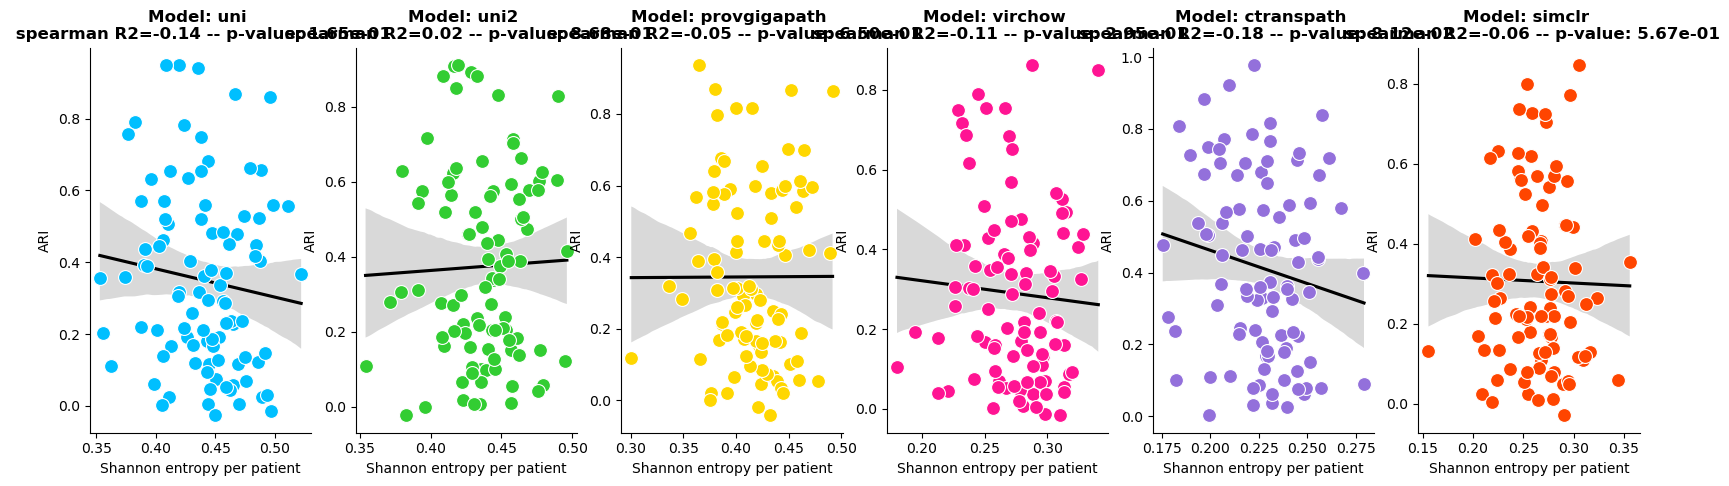

In [44]:
plt.figure(figsize=(20, 5))
for i, model in enumerate(df_model_summary2['model'].unique()):
    plt.subplot(1, len(df_model_summary2['model'].unique()), i+1)
    sub_df = df_model_summary2[df_model_summary2['model'] == model]
    s, p = spearmanr(sub_df['shannon_entropy_per_patient'], sub_df['ari'])
    sns.regplot(data=sub_df, x='shannon_entropy_per_patient', y='ari', color='black')
    sns.scatterplot(data=sub_df, x='shannon_entropy_per_patient', y='ari', color=config['base_model_palette'][model], s=100, zorder=2)
    plt.legend().remove()
    plt.xlabel('Shannon entropy per patient')
    plt.ylabel('ARI')
    plt.title(f'Model: {model} \n spearman R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
    sns.despine()
    plt.savefig(os.path.join(config['figures_folder'], f"Figure2/shannon_entropy_vs_ari_per_patient_{model}.pdf"), bbox_inches='tight')

ValueError: num must be an integer with 1 <= num <= 8, not 9

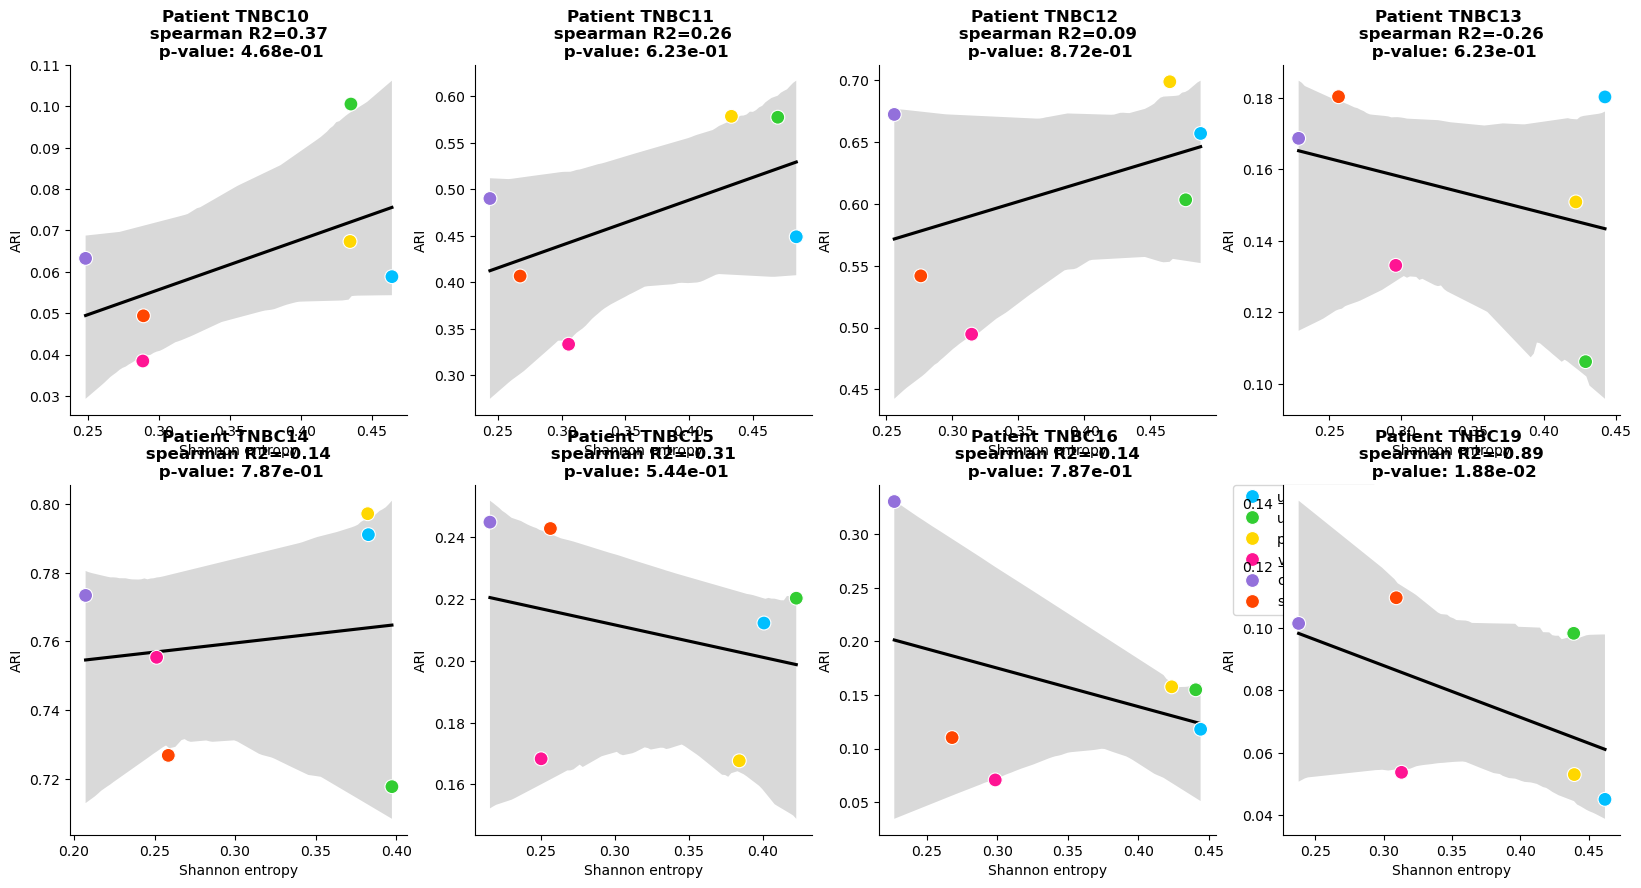

In [45]:
plt.figure(figsize=(20, 10))
for i, patient in enumerate(df_model_summary2['patient'].unique()):
    sub_df = df_model_summary2[df_model_summary2['patient'] == patient]

    s, p = spearmanr(sub_df['shannon_entropy_per_patient'], sub_df['ari'])
    plt.subplot(2, 4, i+1)
    sns.regplot(data=sub_df, x='shannon_entropy_per_patient', y='ari', color='black')
    sns.scatterplot(data=sub_df, x='shannon_entropy_per_patient', y='ari', hue=sub_df['model'],
                    palette=base_model_palette, s=100, zorder=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Shannon entropy')
    plt.ylabel('ARI')
    plt.title(f'Patient {patient} \n spearman R2={s:.2f} \n p-value: {p:.2e}', weight='bold')
    sns.despine()

    if i != 6:
        plt.legend().remove()
    else:
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_per_patient_vs_ari_per_patient.pdf"), bbox_inches='tight')


In [ ]:
umap_clust[base_model_list[0]].keys()

Model: uni, Type: TNBC10, Dist: 0.001
Model: uni2, Type: TNBC10, Dist: 0.001
Model: virchow, Type: TNBC10, Dist: 0.001
Model: provgigapath, Type: TNBC10, Dist: 0.001
Model: ctranspath, Type: TNBC10, Dist: 0.001
Model: simclr, Type: TNBC10, Dist: 0.001
Model: uni, Type: TNBC11, Dist: 0.001
Model: uni2, Type: TNBC11, Dist: 0.001
Model: virchow, Type: TNBC11, Dist: 0.001
Model: provgigapath, Type: TNBC11, Dist: 0.001
Model: ctranspath, Type: TNBC11, Dist: 0.001
Model: simclr, Type: TNBC11, Dist: 0.001
Model: uni, Type: TNBC12, Dist: 0.001
Model: uni2, Type: TNBC12, Dist: 0.001
Model: virchow, Type: TNBC12, Dist: 0.001
Model: provgigapath, Type: TNBC12, Dist: 0.001
Model: ctranspath, Type: TNBC12, Dist: 0.001
Model: simclr, Type: TNBC12, Dist: 0.001
Model: uni, Type: TNBC13, Dist: 0.001
Model: uni2, Type: TNBC13, Dist: 0.001
Model: virchow, Type: TNBC13, Dist: 0.001
Model: provgigapath, Type: TNBC13, Dist: 0.001
Model: ctranspath, Type: TNBC13, Dist: 0.001
Model: simclr, Type: TNBC13, Dist

ValueError: num must be an integer with 1 <= num <= 12, not 13

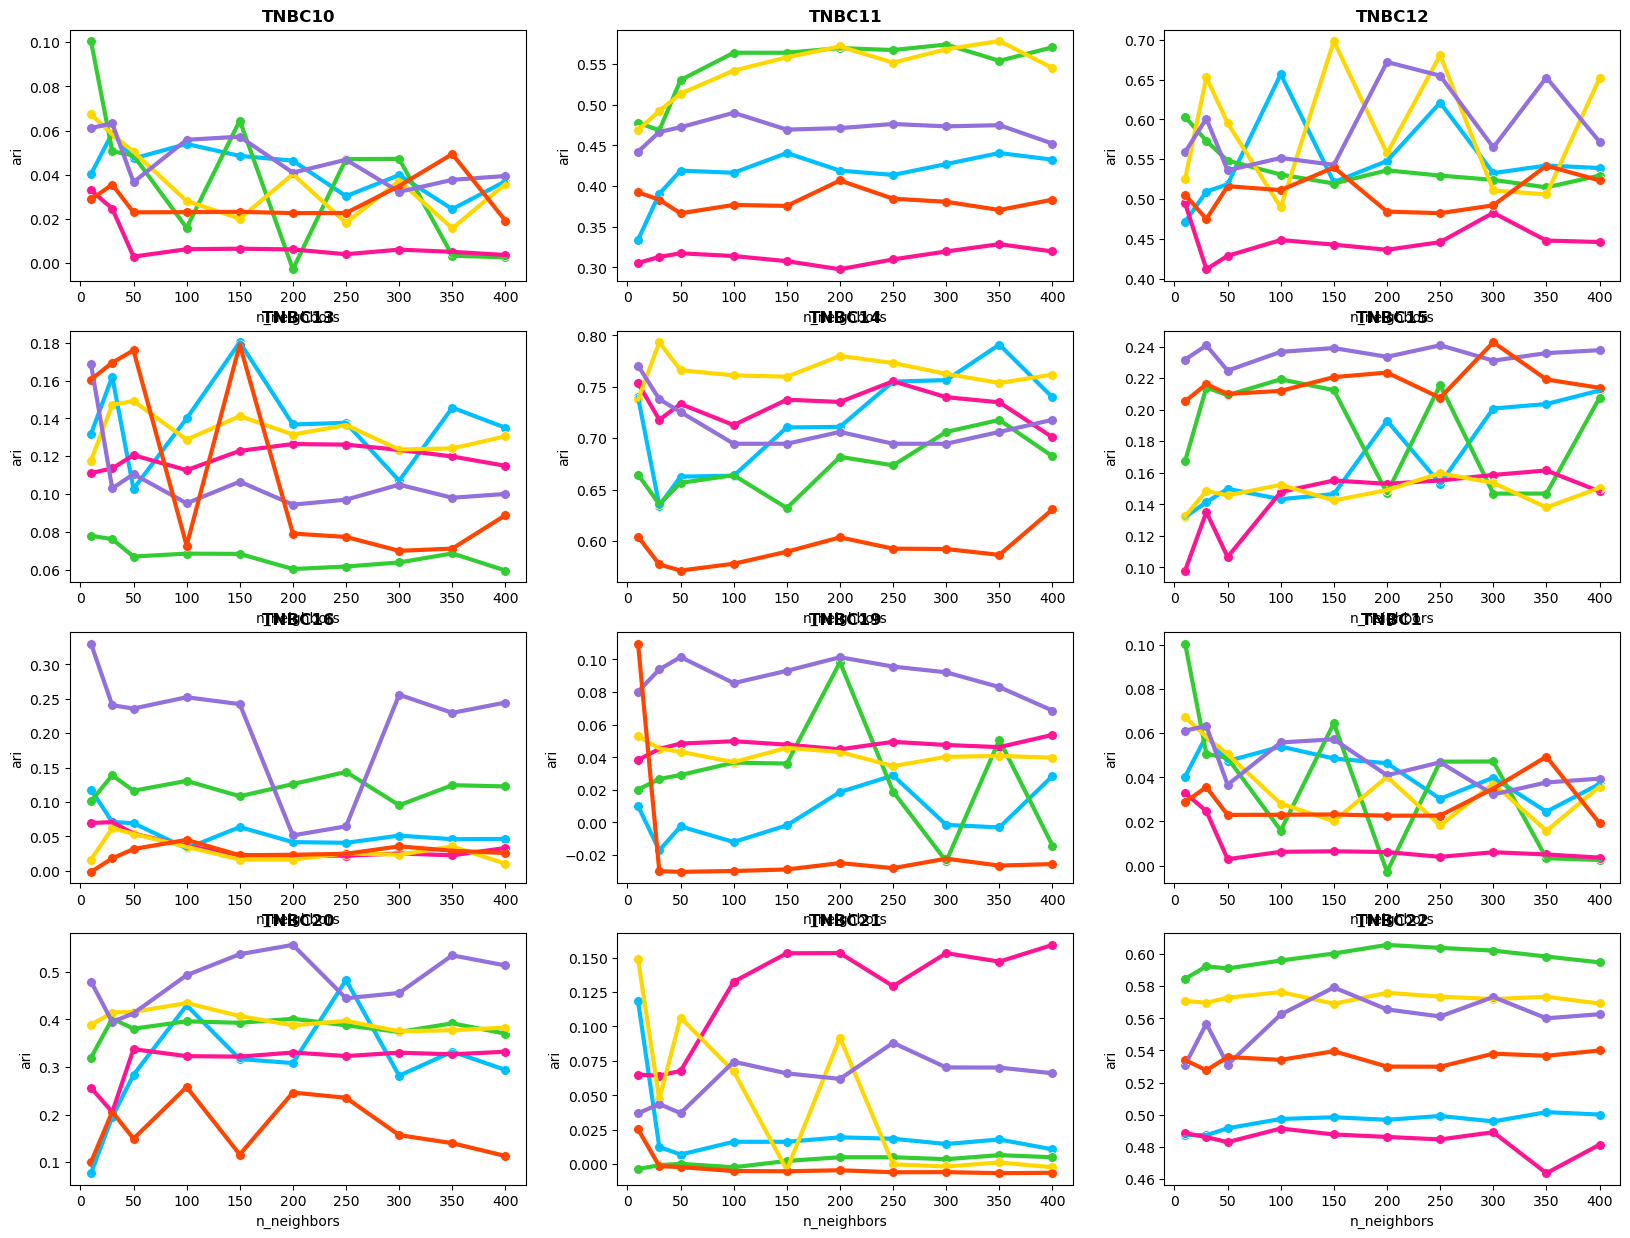

In [62]:
## UMAP validation parameters
import glob 

for dist in [0.001, 0.1]:
    plt.figure(figsize=(20, 15))
    for i, type in enumerate(umap_clust[base_model_list[0]].keys()):
        plt.subplot(4, 3, i+1)
        
        filenames = []
        for model in base_model_palette.keys():
            if (model != 'scMTOP') & (model != 'handcrafted') & (model != 'handcrafted_features'):
                print(f"Model: {model}, Type: {type}, Dist: {dist}")
                filename = glob.glob(os.path.join(config['base_benchmark_folder'], 'unsupervised_clustering_ARI', "kmeans", f"UMAP_validation_{model}_{type}*.csv"))[0]
                filenames.append(filename)

                df_ = pd.read_csv(filename, index_col=0)
                
                sns.scatterplot(x=df_[df_['min_dist'] == dist]['n_neighbors'], 
                                y=df_[df_['min_dist'] == dist]['ari'], 
                                label=f"{model} - {type}",  
                                s=50, 
                                color=base_model_palette[model], legend=False)
                
                sns.lineplot(x=df_[df_['min_dist'] == dist]['n_neighbors'], y=df_[df_['min_dist'] == dist]['ari'], 
                             label=f"{model} - {type}", 
                             color=base_model_palette[model],
                             linewidth=3, legend=False)

                plt.legend().remove()
            plt.title(type, weight='bold')
        
    handles = [plt.Line2D([0], [0], color=base_model_palette[model], lw=4) for model in base_model_list]
    plt.legend(handles, base_model_list, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)        
    sns.despine()
    plt.suptitle(f"UMAP validation - min_dist={dist}", weight='bold')
    plt.tight_layout()
        
    plt.savefig(os.path.join(config['figures_folder'], "Figure2/UMAP_parameters_validation_mindist_{dist}.pdf"), bbox_inches='tight')

## Correlation with the number of parameters

In [47]:

parameters = {'provgigapath': 1135, 'uni2': 681, 'virchow': 632, 'uni': 303, 'ctranspath': 28, 'simclr': 24}

embedding_size = {'provgigapath': 1536, 'uni2': 1536, 'virchow': 1280, 'uni': 1024, 'ctranspath': 768, 'simclr': 512}


In [48]:
df_shannon

df_parameters = pd.DataFrame.from_dict(parameters, orient='index', columns=['n_parameters'])
df_parameters = df_parameters.merge(df_shannon, left_index=True, right_index=True)

df_embedding_size = pd.DataFrame.from_dict(embedding_size, orient='index', columns=['embedding_size'])
df_embedding_size = df_embedding_size.merge(df_shannon, left_index=True, right_index=True)

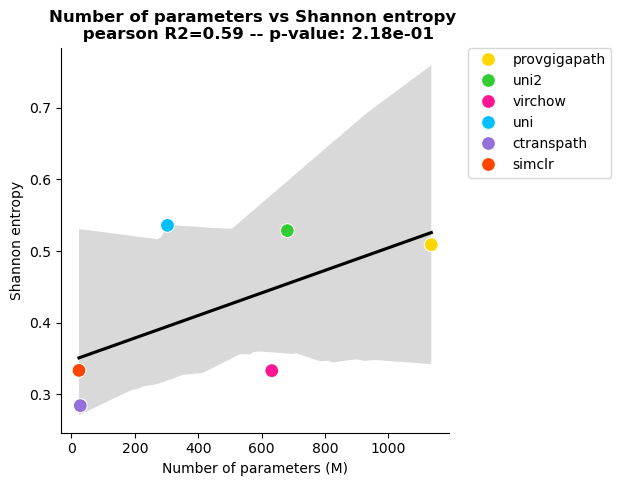

In [49]:
# compute pearson correlation

s, p = pearsonr(df_parameters['n_parameters'], df_parameters['shannon_entropy'])
plt.figure(figsize=(5, 5))
sns.regplot(df_parameters, x='n_parameters', y='shannon_entropy', color='black')
sns.scatterplot(df_parameters, x='n_parameters', y='shannon_entropy', hue=df_parameters.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of parameters (M)')
plt.ylabel('Shannon entropy')
plt.title(f"Number of parameters vs Shannon entropy \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/embedding_size_vs_shannon_entropy.pdf"), bbox_inches='tight')

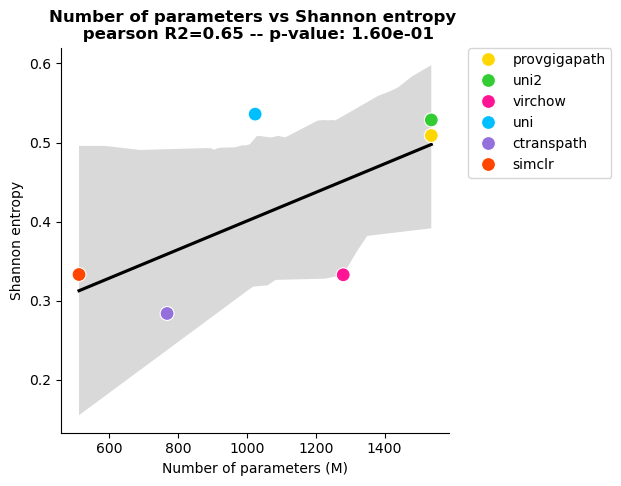

In [50]:
# compute pearson correlation

s, p = pearsonr(df_embedding_size['embedding_size'], df_embedding_size['shannon_entropy'])
plt.figure(figsize=(5, 5))
sns.regplot(df_embedding_size, x='embedding_size', y='shannon_entropy', color='black')
sns.scatterplot(df_embedding_size, x='embedding_size', y='shannon_entropy', hue=df_embedding_size.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of parameters (M)')
plt.ylabel('Shannon entropy')
plt.title(f"Number of parameters vs Shannon entropy \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/number_of_parameters_vs_shannon_entropy.pdf"), bbox_inches='tight')

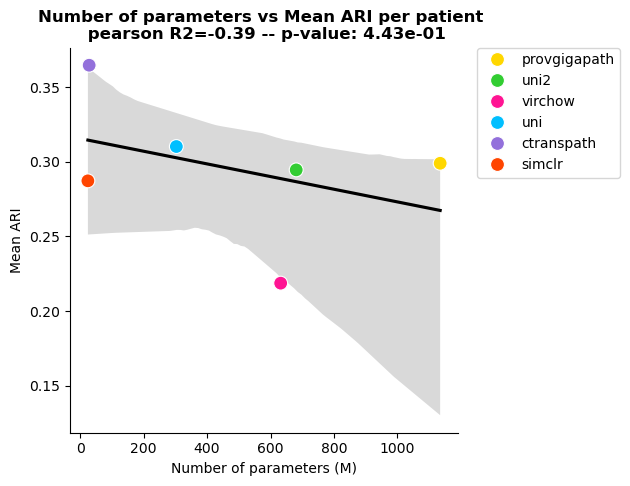

In [51]:
df_parameters = df_parameters.merge(df_model_summary[['mean_ari']], left_index=True, right_index=True)

s, p = pearsonr(df_parameters['n_parameters'], df_parameters['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(df_parameters, x='n_parameters', y='mean_ari', color='black')
sns.scatterplot(df_parameters, x='n_parameters', y='mean_ari', hue=df_parameters.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of parameters (M)')
plt.ylabel('Mean ARI')
plt.title(f"Number of parameters vs Mean ARI per patient \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/number_of_parameters_vs_mean_ari.pdf"), bbox_inches='tight')

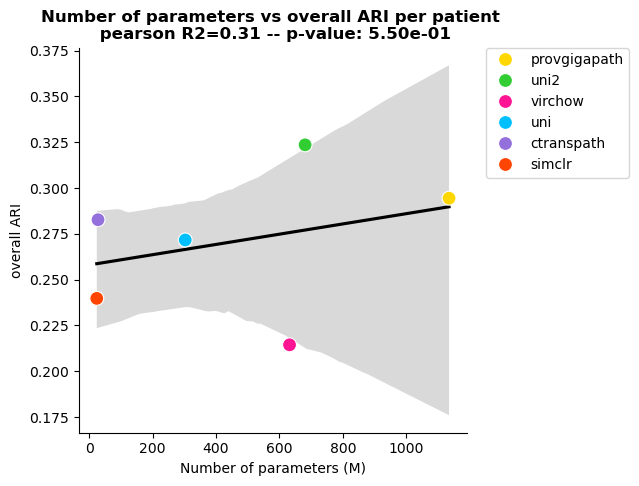

In [52]:
df_parameters = df_parameters.merge(df_model_summary[['overall_ari']], left_index=True, right_index=True)

s, p = pearsonr(df_parameters['n_parameters'], df_parameters['overall_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(df_parameters, x='n_parameters', y='overall_ari', color='black')
sns.scatterplot(df_parameters, x='n_parameters', y='overall_ari', hue=df_parameters.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of parameters (M)')
plt.ylabel('overall ARI')
plt.title(f"Number of parameters vs overall ARI per patient \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/number_of_parameters_vs_overall_ari.pdf"), bbox_inches='tight')

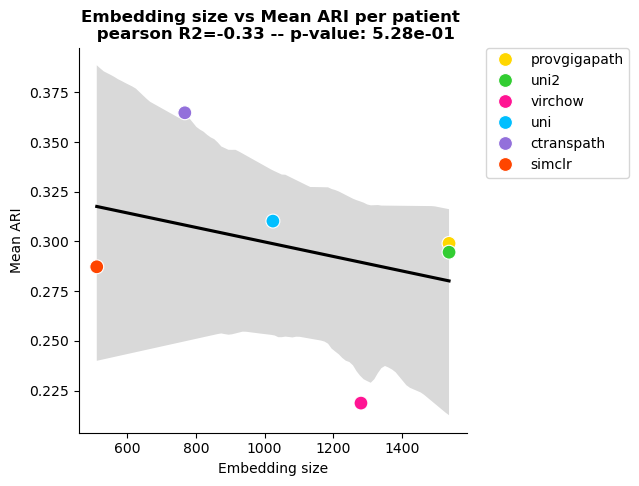

In [53]:
df_embedding_size = df_embedding_size.merge(df_model_summary[['mean_ari']], left_index=True, right_index=True)

s, p = pearsonr(df_embedding_size['embedding_size'], df_embedding_size['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(df_embedding_size, x='embedding_size', y='mean_ari', color='black')
sns.scatterplot(df_embedding_size, x='embedding_size', y='mean_ari', hue=df_embedding_size.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Embedding size')
plt.ylabel('Mean ARI')
plt.title(f"Embedding size vs Mean ARI per patient \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/embedding_size_vs_mean_ari.pdf"), bbox_inches='tight')